In [11]:
#Importing all of the required packages/libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # to ignore warnings if any

In [3]:
#Loading the dataset

loan = pd.read_csv("loan.csv",dtype=object)

1.21.5


In [195]:
#Checking first five rows of the dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [196]:
#Shape/Structure of the dataset 
#Total rows =397171 and columns =111
print(loan.shape)

(39717, 111)


# Data Cleaning

In [197]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [198]:
(loan.isna().sum()/loan.shape[0])*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [199]:
# we can observe that there are multiple columns with NaN values
# Drop all columns having all NaN values
loan.dropna(axis=1, how='all',inplace=True)

In [200]:
# We can see that all NaN value columns have been dropped now columns = 57
loan.shape

(39717, 57)

In [201]:
# We can see that there are few columns like id, member_id,emp_title,url,desc,title,mths_since_last_record etc are ir-relevant for this analysis
loan.drop(["id","member_id","emp_title","url","desc","title","mths_since_last_record"],axis=1,inplace=True)


In [202]:
#dropping columns having single value
#print(loan.policy_code.value_counts())
# print(loan.acc_now_delinq.value_counts())
# print(loan.collections_12_mths_ex_med.value_counts())
# print(loan.pymnt_plan.value_counts())
# print(loan.policy_code.value_counts())
# print(loan.chargeoff_within_12_mths.value_counts())
# print(loan.delinq_amnt.value_counts())
# print(loan.tax_liens.value_counts())
#print(loan.initial_list_status.value_counts())
#print(loan.delinq_amnt.value_counts())
#print(loan.application_type.value_counts())
#print(loan.pub_rec_bankruptcies.value_counts())
# we can drop because they are of single value and don't add much information for default analysis
loan.drop(["policy_code","acc_now_delinq","collections_12_mths_ex_med","pymnt_plan","policy_code","chargeoff_within_12_mths","tax_liens","pub_rec_bankruptcies","application_type","initial_list_status","mths_since_last_delinq"],axis=1,inplace=True)

In [203]:
# Remove columns which are post loan/loan has already approved/customer behavior variables
loan.drop(["last_credit_pull_d","out_prncp_inv","total_pymnt_inv","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","total_pymnt","earliest_cr_line","earliest_cr_line","inq_last_6mths","pub_rec","revol_bal","revol_util","total_acc","out_prncp","total_rec_prncp","total_rec_int","total_rec_late_fee","open_acc"],axis=1,inplace=True)

In [204]:
#check details of each columns and their time
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   loan_amnt            39717 non-null  object
 1   funded_amnt          39717 non-null  object
 2   funded_amnt_inv      39717 non-null  object
 3   term                 39717 non-null  object
 4   int_rate             39717 non-null  object
 5   installment          39717 non-null  object
 6   grade                39717 non-null  object
 7   sub_grade            39717 non-null  object
 8   emp_length           38642 non-null  object
 9   home_ownership       39717 non-null  object
 10  annual_inc           39717 non-null  object
 11  verification_status  39717 non-null  object
 12  issue_d              39717 non-null  object
 13  loan_status          39717 non-null  object
 14  purpose              39717 non-null  object
 15  zip_code             39717 non-null  object
 16  addr

# Data Updation & Mutation

In [205]:
loan.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [206]:
#Updating column 'term' value and change type to integer
loan.term = loan["term"].apply(lambda x: x.strip()[0:2])
loan.term = loan.term.astype(int)

In [207]:
#Updating column 'int_rate' value and change type to integer
loan.int_rate = loan["int_rate"].apply(lambda x : x[0:-1])
loan.int_rate = loan.int_rate.astype(float)

In [208]:
#Change the data type from object to proper type like int or float
loan.annual_inc = loan.annual_inc.astype(float)
loan.loan_amnt = loan.loan_amnt.astype(float)
loan.funded_amnt = loan.funded_amnt.astype(float)
loan.dti = loan.dti.astype(float)
loan.installment = loan.installment.astype(float)
loan.funded_amnt_inv = loan.funded_amnt_inv.astype(float)

In [209]:
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [210]:
loan.emp_length.isnull().sum()/loan.shape[0]*100

2.7066495455346575

In [211]:
np.sum(loan.emp_length.isnull())

1075

In [212]:
# 1075 entires has NaN for emp_length
# We have to decide whether to drop all or mutate these entries because there might be chances of more 'Charged off' loans
# As default loan largely depends on emp_length we can't mutate them or set some default value/average or median.
#Better we will drop all of them having NaN values as null percentage is also very less 2.7, dropping will not affect much

In [213]:
def format_(x):
    x = x.replace("years","")
    x = x.replace("year","")
    x = x.replace("+","")
    x = x.replace("<","")
    return (int)(x.strip())

loan =loan[~loan.emp_length.isnull()]   #Dropping rows having NaN in emp_length
loan.emp_length = loan.emp_length.apply(lambda x :format_(x)) # Formatting and changing type

# Derive Metrics

In [214]:
# From issue_d column we can drive issue_day, issue_month and issue_year
#Creating new column issue_month and issue_year from issue_d 11/12. As issue_day is irrevelant so we ignore
loan.issue_d = pd.to_datetime(loan.issue_d.str.upper(), format='%b-%y',yearfirst=False)

loan["issue_month"] = loan.issue_d.dt.month
loan["issue_year"] = loan.issue_d.dt.year

In [215]:
# we can drop issue_d column as this is no more required
loan.drop(["issue_d"],axis=1,inplace=True)

# Handle Outliers

In [216]:
loan.funded_amnt_inv.value_counts()

5000.00000     1253
10000.00000    1235
6000.00000     1160
12000.00000    1054
8000.00000      870
               ... 
7768.60000        1
24761.34276       1
15494.53490       1
23575.11517       1
12413.59181       1
Name: funded_amnt_inv, Length: 8097, dtype: int64

In [217]:
print(np.max(loan.funded_amnt_inv))
print(np.min(loan.funded_amnt_inv))
print(loan.funded_amnt_inv.quantile(.99))

35000.0
0.0
34750.0


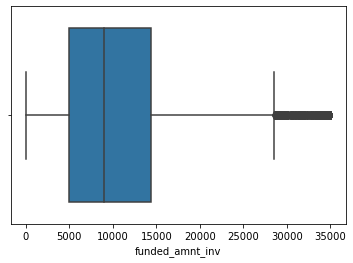

In [218]:
sns.boxplot(loan.funded_amnt_inv)
plt.show()

In [219]:
#Analysed that there are no much outliers for funded_amnt_inv

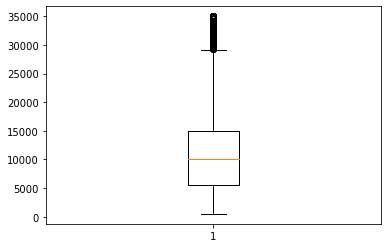

In [220]:
# Analyse loan amount
plt.boxplot(loan.loan_amnt)
plt.show()

In [221]:
print('Max loan amount : ',loan.loan_amnt.max())
print('99 % loan amount : ',loan.loan_amnt.quantile(.99))
#We can't remove the outliers for loan amount as most the default loan may fall in this

Max loan amount :  35000.0
99 % loan amount :  35000.0


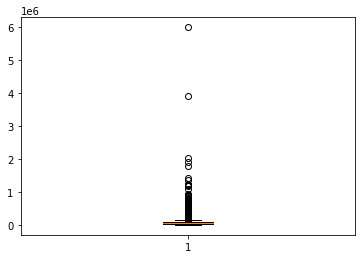

In [222]:
# Analyse annual income
plt.boxplot(loan.annual_inc)
plt.show()

In [223]:
#Clearly we can see outliers
print('Max Annual Income : ',loan.annual_inc.max())
print('99 % Annual Income : ',loan.annual_inc.quantile(.99))
loan.shape

Max Annual Income :  6000000.0
99 % Annual Income :  235000.0


(38642, 21)

In [224]:
annual_income_99pct = loan.annual_inc.quantile(.99)
loan = loan[loan.annual_inc<=annual_income_99pct]
loan.shape

(38257, 21)

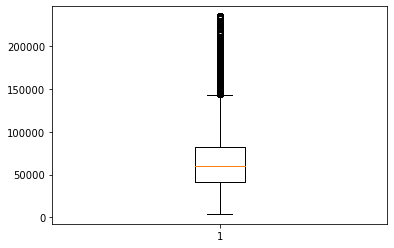

In [225]:
plt.boxplot(loan.annual_inc)
plt.show()

In [226]:
# Analysed the annual income and found that 99% has salary less than 235000, so removing those having annual income
#falls above 99% 

# Analysis and visualization

In [227]:
(loan.loan_status.value_counts(1)*100)

Fully Paid     83.156024
Charged Off    14.010508
Current         2.833468
Name: loan_status, dtype: float64

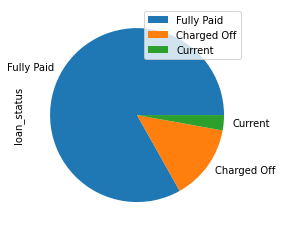

In [228]:
(loan.loan_status.value_counts(1)*100).plot(kind="pie")
plt.legend()
plt.show()

In [229]:
# We can see that 14.01 % are default loans.

<AxesSubplot:>

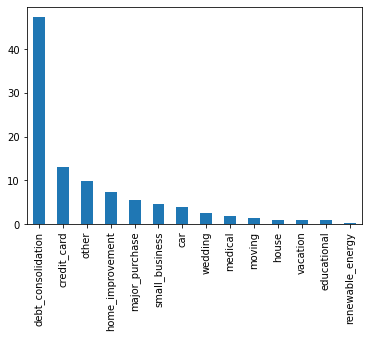

In [230]:
(loan.purpose.value_counts(1)*100).plot(kind="bar")

In [231]:
#Maximum loans are taken for the purpose of det_consolidation

# As We have analyse default loan's "Current" loan status can be removed

In [232]:
#We can drop rows having loan status as "Current" because they will not impact
# default loan analysis and their % is very less which will not impact our observations
loan = loan[loan.loan_status!="Current"]
loan.shape

(37173, 21)

In [233]:
loan.loan_status.value_counts(1)

Fully Paid     0.855809
Charged Off    0.144191
Name: loan_status, dtype: float64

In [234]:
# As we have only two types of loan status Fully Paid and Charged Off
# We can treate them as 0 and 1 respectively
loan["loan_status"] = loan["loan_status"].apply(lambda x:1 if x=="Charged Off" else 0)

In [235]:
loan.loan_status.value_counts(1)

0    0.855809
1    0.144191
Name: loan_status, dtype: float64

# Assumption

+ For default loan we have consider the <b>funded_amnt_inv</b> column as this is the final amount which is lend to the borrower by the lending company.


# Univariate Analysis

# interest rate

In [236]:
#Analyse interest rate
print(np.max(loan.int_rate))
print(np.min(loan.int_rate))


24.4
5.42


In [237]:
int_rate_bins = list(range(5,27,3))
int_rate_labels = ["5% - 8%","8% - 11%","11% - 14%","14% - 17%","17% - 20%","20% - 23%","23% - 26%"]
loan["int_rate_range"] = pd.cut(loan['int_rate'],int_rate_bins,labels=int_rate_labels)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,delinq_amnt,issue_month,issue_year,int_rate_range
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,RENT,...,0,credit_card,860xx,AZ,27.65,0,0,12,2011,8% - 11%
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,1,RENT,...,1,car,309xx,GA,1.00,0,0,12,2011,14% - 17%
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,RENT,...,0,small_business,606xx,IL,8.72,0,0,12,2011,14% - 17%
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,RENT,...,0,other,917xx,CA,20.00,0,0,12,2011,11% - 14%
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3,RENT,...,0,wedding,852xx,AZ,11.20,0,0,12,2011,5% - 8%


<AxesSubplot:xlabel='int_rate_range'>

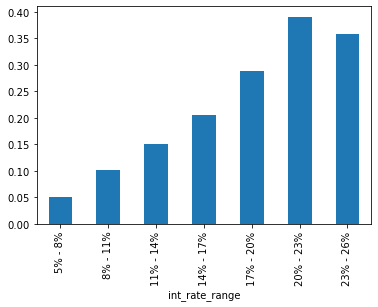

In [238]:
loan.groupby("int_rate_range")["loan_status"].mean().plot(kind="bar")

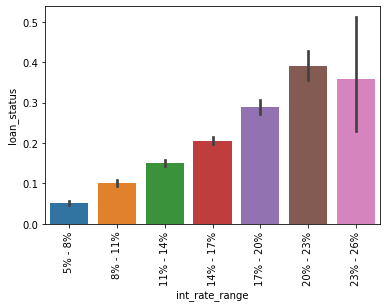

In [239]:
sns.barplot(x="int_rate_range", y='loan_status', data=loan)
plt.xticks(rotation=90)
plt.show()

In [240]:
# We can see that with increase in interest rate, default rate increasing

# funded_amnt_inv

In [241]:
#Analyse funded_amnt_inv
print(np.max(loan.funded_amnt_inv))
print(np.min(loan.funded_amnt_inv))

35000.0
0.0


In [242]:
funded_amnt_bins = list(range(0,40000,5000))
funded_amnt_bins

[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]

In [243]:
loan["funded_amnt_inv_range"] = pd.cut(loan["funded_amnt_inv"],bins=funded_amnt_bins,labels=["0-5k","5k-10k","10k-15k","15k-20k","20k-25k","25k-30k","30k-35k"])

In [244]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,zip_code,addr_state,dti,delinq_2yrs,delinq_amnt,issue_month,issue_year,int_rate_range,funded_amnt_inv_range
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,RENT,...,credit_card,860xx,AZ,27.65,0,0,12,2011,8% - 11%,0-5k
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,1,RENT,...,car,309xx,GA,1.00,0,0,12,2011,14% - 17%,0-5k
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,RENT,...,small_business,606xx,IL,8.72,0,0,12,2011,14% - 17%,0-5k
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,RENT,...,other,917xx,CA,20.00,0,0,12,2011,11% - 14%,5k-10k
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3,RENT,...,wedding,852xx,AZ,11.20,0,0,12,2011,5% - 8%,0-5k


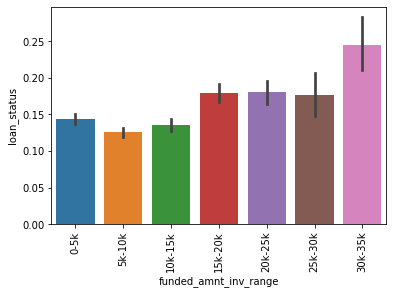

In [245]:
sns.barplot(x="funded_amnt_inv_range",y="loan_status",data=loan)
plt.xticks(rotation=90)
plt.show()

In [246]:
# We can see that with increase in funded_amnt_inv , default loans increasing

# term

In [247]:
#Analyse term
loan.term.value_counts(1)*100

36    75.37729
60    24.62271
Name: term, dtype: float64

In [248]:
# Only two type of terms are available 36 and 60

<AxesSubplot:xlabel='term'>

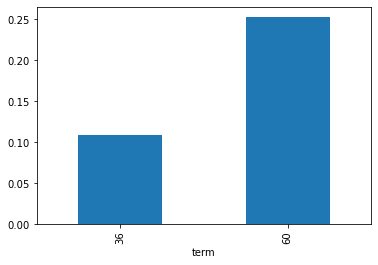

In [249]:
loan.groupby("term")["loan_status"].mean().plot(kind="bar")

In [250]:
# We can see that with increase in terms defaulter increasing
# 36 term has less defaults than 60 term

# Verification Status

Not Verified       43.558497
Verified           31.210825
Source Verified    25.230678
Name: verification_status, dtype: float64


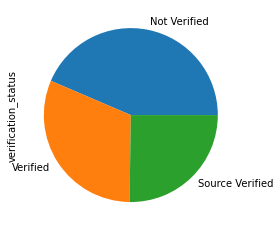

In [251]:
# Analyse Verification Status
print(loan.verification_status.value_counts(1)*100)
(loan.verification_status.value_counts(1)*100).plot(kind="pie")
plt.show()

In [252]:
# we have three kinds of verification status 
#Not Verified       43.558497%
#Verified           31.210825%
#Source Verified    25.230678%

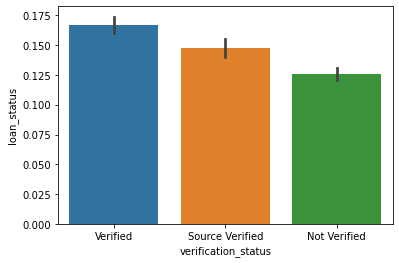

In [253]:
sns.barplot(x="verification_status",y="loan_status",data=loan)
plt.show()

In [254]:
# We can't infer much information from verification status, <Most default loans are from Verified status>

# emp_length

In [255]:
# Analyse emp_length
print(np.max(loan.emp_length))
print(np.min(loan.emp_length))
emp_length_bins = list(range(0,11,2))
print(emp_length_bins)
emp_length_labels=["0-2 year","2-4 year","4-6 year","6-8 year","8-10+ year"]

10
1
[0, 2, 4, 6, 8, 10]


In [256]:
loan["emp_length_range"] = pd.cut(loan["emp_length"],bins=emp_length_bins,labels=emp_length_labels)

In [257]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,zip_code,addr_state,dti,delinq_2yrs,delinq_amnt,issue_month,issue_year,int_rate_range,funded_amnt_inv_range,emp_length_range
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,RENT,...,860xx,AZ,27.65,0,0,12,2011,8% - 11%,0-5k,8-10+ year
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,1,RENT,...,309xx,GA,1.00,0,0,12,2011,14% - 17%,0-5k,0-2 year
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,RENT,...,606xx,IL,8.72,0,0,12,2011,14% - 17%,0-5k,8-10+ year
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,RENT,...,917xx,CA,20.00,0,0,12,2011,11% - 14%,5k-10k,8-10+ year
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3,RENT,...,852xx,AZ,11.20,0,0,12,2011,5% - 8%,0-5k,2-4 year


<AxesSubplot:xlabel='emp_length_range'>

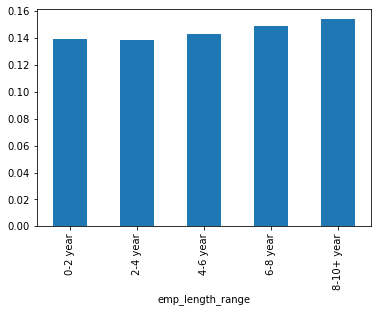

In [258]:
(loan.groupby("emp_length_range")["loan_status"].mean()).plot(kind="bar")

<AxesSubplot:xlabel='emp_length_range', ylabel='loan_status'>

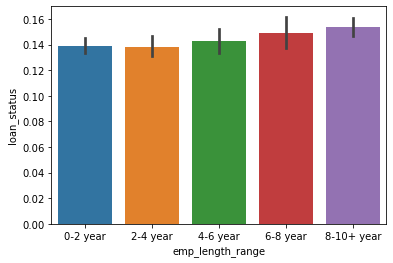

In [259]:
sns.barplot(x="emp_length_range",y="loan_status",data=loan)

In [260]:
# We can see that it's almost constant and can't infer much from this

# purpose

In [261]:
# Analyse purpose
loan.purpose.value_counts(1)*100

debt_consolidation    47.184785
credit_card           13.079386
other                  9.902348
home_improvement       7.282167
major_purchase         5.541657
small_business         4.522099
car                    3.876469
wedding                2.434563
medical                1.745891
moving                 1.468808
vacation               0.936163
house                  0.928093
educational            0.850079
renewable_energy       0.247491
Name: purpose, dtype: float64

In [262]:
loan.groupby("purpose")["loan_status"].mean()*100

purpose
car                   10.756419
credit_card           10.407240
debt_consolidation    15.193843
educational           16.455696
home_improvement      11.858146
house                 16.811594
major_purchase        10.145631
medical               15.562404
moving                15.201465
other                 16.082586
renewable_energy      19.565217
small_business        27.305175
vacation              14.367816
wedding               10.055249
Name: loan_status, dtype: float64

<AxesSubplot:ylabel='loan_status'>

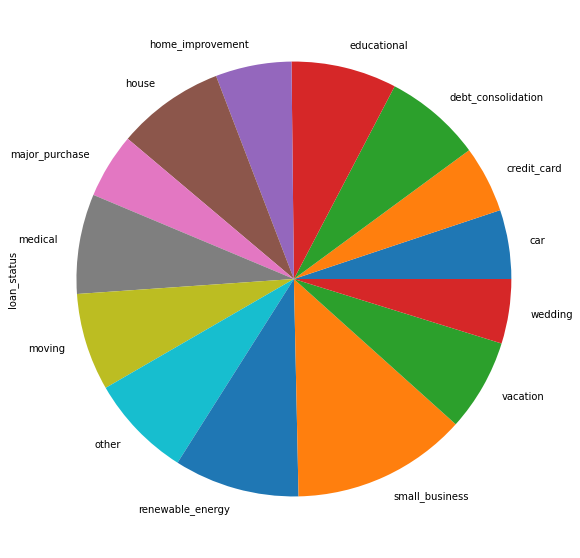

In [263]:
plt.figure(figsize=[20,10])
(loan.groupby("purpose")["loan_status"].mean()*100).plot(kind="pie")

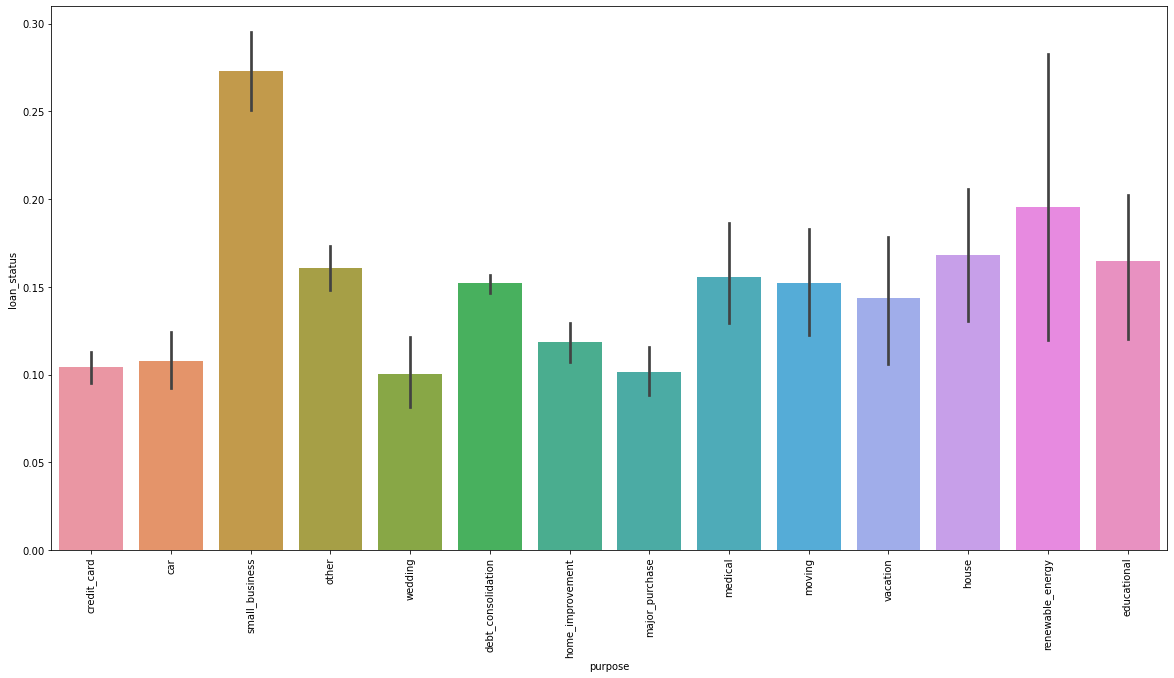

In [264]:
plt.figure(figsize=[20,10])
sns.barplot(x="purpose",y="loan_status",data=loan)
plt.xticks(rotation=90)
plt.show()

In [265]:
# We can see that most of the types have same rate of default except small_business

# annual_inc

In [266]:
# Analyse annual_inc
print(np.max(loan.annual_inc))
print(np.min(loan.annual_inc))
annual_inc_bins = list(range(4000,250000,30000))
print(annual_inc_bins)

235000.0
4000.0
[4000, 34000, 64000, 94000, 124000, 154000, 184000, 214000, 244000]


In [267]:
loan["annual_inc_range"] = pd.cut(loan["annual_inc"],bins=8,labels=["4k-34k","34k-64k","64k-94k","94k-124k","124k-154k","154k-184k","184k-214k","214k-244k"])

<AxesSubplot:xlabel='annual_inc_range'>

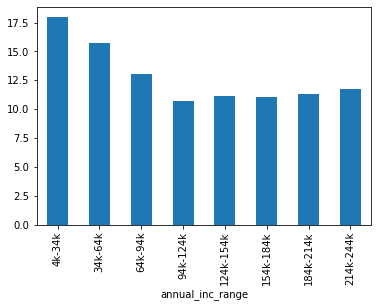

In [268]:
(loan.groupby("annual_inc_range")["loan_status"].mean()*100).plot(kind="bar")

In [269]:
# We can observe that that with increase in annual income, default loan decrease

# homw_ownership

In [270]:
# Analyse homw_ownership
print(loan.home_ownership.value_counts(1)*100)

RENT        48.419552
MORTGAGE    43.932424
OWN          7.381702
OTHER        0.258252
NONE         0.008070
Name: home_ownership, dtype: float64


In [271]:
#RENT        48.419552
#MORTGAGE    43.932424
#OWN          7.381702
#OTHER        0.258252
#NONE         0.008070

# We can fill rows having NONE values with OTHER as their precentage is very low
loan["home_ownership"] = loan["home_ownership"].apply(lambda x: "OTHER" if x == "NONE" else x)

<AxesSubplot:xlabel='home_ownership'>

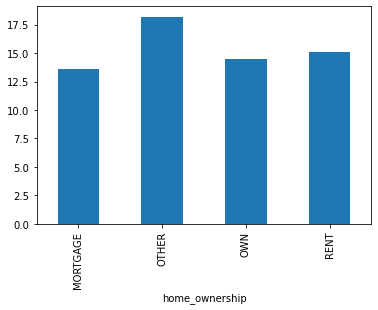

In [272]:
(loan.groupby("home_ownership")["loan_status"].mean()*100).plot(kind="bar")

In [273]:
# We can see that default loans constant for OWN/RENT/MORTGAGE but more are in OTHER
# Can't infer anything from this

# grade

In [274]:
# Analyse grade
loan.grade.dtype

dtype('O')

In [275]:
print(loan.groupby("grade")["loan_status"].mean()*100)

grade
A     5.806317
B    11.936457
C    16.897142
D    21.933387
E    26.858700
F    32.729211
G    34.027778
Name: loan_status, dtype: float64


<AxesSubplot:xlabel='grade'>

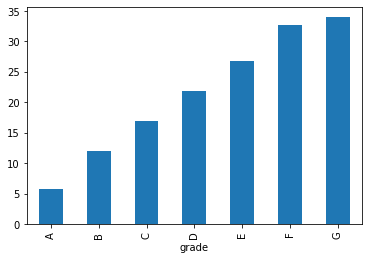

In [276]:
(loan.groupby("grade")["loan_status"].mean()*100).plot(kind="bar")

In [277]:
# We can devide the gardes in sub group like 
#A-C- High
#D-E Mid
# F-G Low
# Convert them to number grading like A-1,B-2,C-3,D-4,E-5,F-6,G-7
def grade_con(x):
    if x== "A":
        return 1
    if x=="B":
        return 2
    if x=="C":
        return 3
    if x=="D":
        return 4
    if x=="E":
        return 5
    if x== "F":
        return 6
    if x=="G":
        return 7
      
loan.grade.value_counts()        
loan["grade"]=loan.grade.apply(lambda x:grade_con(x))    
loan.grade.value_counts()

2    11268
1     9593
3     7593
4     4924
5     2569
6      938
7      288
Name: grade, dtype: int64

In [278]:
grade_bins = list(range(1,8,2))
grade_bins
loan["grade_range"] = pd.cut(loan["grade"],bins=grade_bins,labels=["1-3","3-5","5-7"])

<AxesSubplot:xlabel='grade_range'>

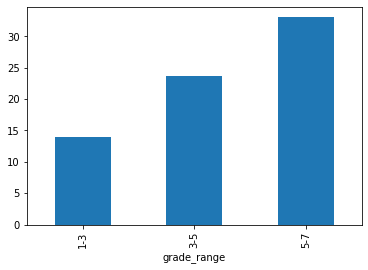

In [279]:
(loan.groupby("grade_range")["loan_status"].mean()*100).plot(kind="bar")

In [280]:
# We can see that with increase in grade , default loans are increasing 

# subgrade

In [281]:
# Analyse subgrade
print(loan.sub_grade.dtype)
print(loan.groupby("sub_grade")["loan_status"].mean()*100)

object
sub_grade
A1     2.296651
A2     4.748603
A3     5.202312
A4     6.058420
A5     7.921929
B1     8.942139
B2    10.822060
B3    11.823204
B4    13.341751
B5    13.600629
C1    15.905670
C2    16.303771
C3    17.929117
C4    17.279726
C5    17.944094
D1    17.951542
D2    20.984665
D3    22.841226
D4    23.128492
D5    25.341615
E1    27.104137
E2    26.800670
E3    22.920892
E4    29.951691
E5    28.296703
F1    29.391892
F2    29.646018
F3    29.518072
F4    35.862069
F5    49.523810
G1    32.967033
G2    36.486486
G3    43.181818
G4    23.529412
G5    35.714286
Name: loan_status, dtype: float64


<AxesSubplot:xlabel='grade,sub_grade'>

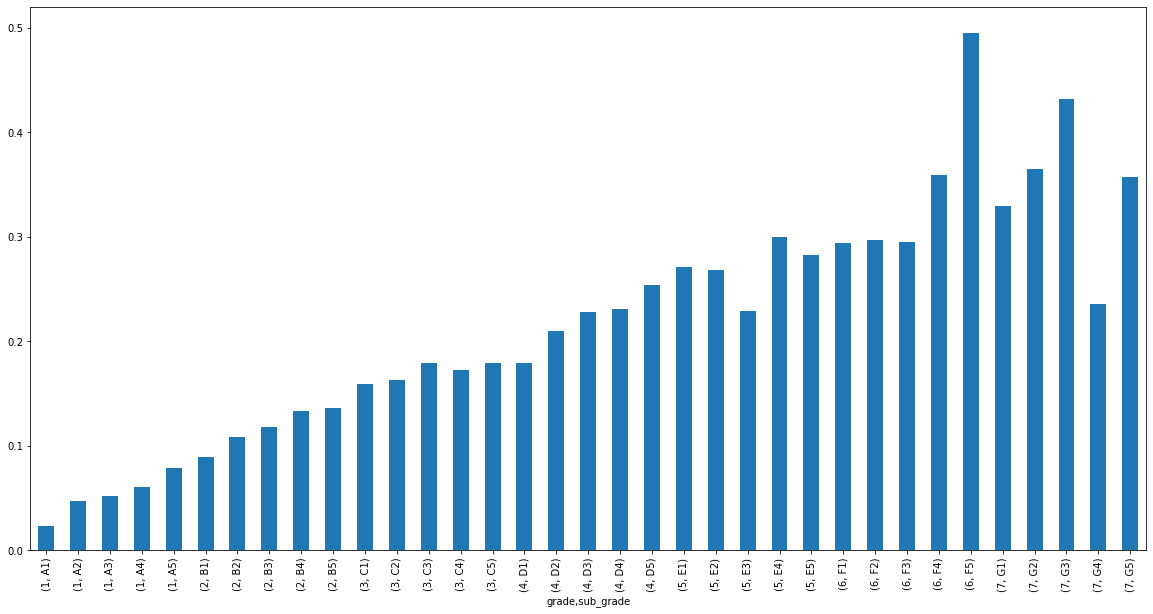

In [282]:
plt.figure(figsize=[20,10])
loan.groupby(['grade','sub_grade'])['loan_status'].mean().plot(kind='bar')

In [283]:
# We can see in subgrade as well there is increse in default loans with increase in grade

# installment

In [284]:
# Analyse installment
print(np.max(loan.installment))
print(np.min(loan.installment))
installment_bins=list(range(15,1500,215))
installment_bins

1305.19
15.69


[15, 230, 445, 660, 875, 1090, 1305]

In [285]:
loan["installment_range"]=pd.cut(loan["installment"],bins=installment_bins,labels=["15-230","230-445","445-660","660-875","875-1090","1090-1305"])


<AxesSubplot:xlabel='installment_range'>

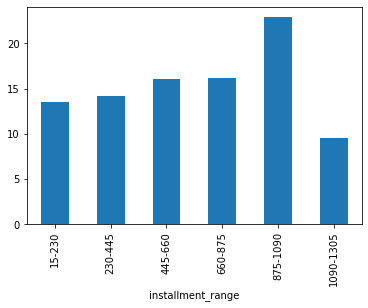

In [286]:
(loan.groupby("installment_range")["loan_status"].mean()*100).plot(kind="bar")

In [287]:
# We can see the defult rates are increasing ,with increase in installment amount

# issue_year

<AxesSubplot:xlabel='issue_year'>

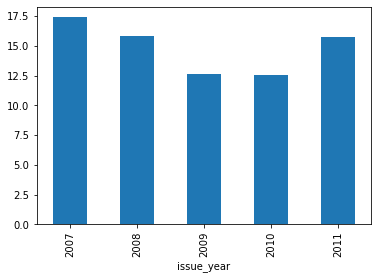

In [288]:
# Analyse year

(loan.groupby("issue_year")["loan_status"].mean()*100).plot(kind="bar")

In [289]:
loan.issue_year.value_counts()

2011    19608
2010    11101
2009     4665
2008     1552
2007      247
Name: issue_year, dtype: int64

(array([  247.,     0.,  1552.,     0.,     0.,  4665.,     0., 11101.,
            0., 19608.]),
 array([2007. , 2007.4, 2007.8, 2008.2, 2008.6, 2009. , 2009.4, 2009.8,
        2010.2, 2010.6, 2011. ]),
 <BarContainer object of 10 artists>)

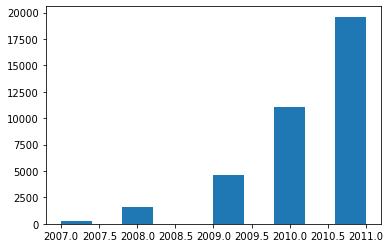

In [295]:
plt.hist(loan.issue_year)

In [291]:
# We can see that during economic downfalt lending organization reduced providing number of loans to borrowers

# issue_month

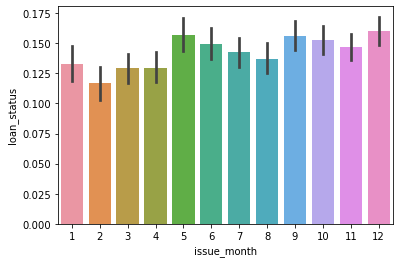

In [296]:
#analyse month
sns.barplot(x="issue_month",y="loan_status",data=loan)
plt.show()

(array([4564., 2602., 2736., 2809., 3061., 3224., 3296., 3360., 3585.,
        7936.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

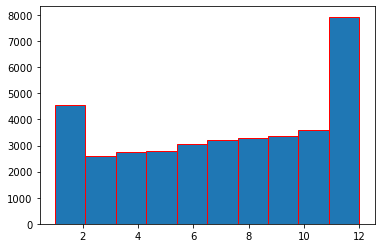

In [297]:
plt.hist(loan.issue_month,edgecolor="red")

(array([ 571.,  336.,  355.,  440.,  457.,  459.,  452.,  525.,  546.,
        1219.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

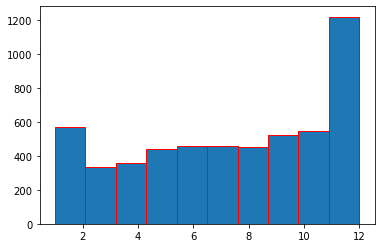

In [298]:
default_loan = loan[loan.loan_status==1]
plt.hist(default_loan.issue_month,edgecolor="red")

# dti

In [299]:
print(loan.dti.max())
print(loan.dti.min())
loan["dti_range"] = pd.cut(loan["dti"],bins=6)
loan.head()

29.99
0.0


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,delinq_amnt,issue_month,issue_year,int_rate_range,funded_amnt_inv_range,emp_length_range,annual_inc_range,grade_range,installment_range,dti_range
0,5000.0,5000.0,4975.0,36,10.65,162.87,2,B2,10,RENT,...,0,12,2011,8% - 11%,0-5k,8-10+ year,4k-34k,1-3,15-230,"(24.992, 29.99]"
1,2500.0,2500.0,2500.0,60,15.27,59.83,3,C4,1,RENT,...,0,12,2011,14% - 17%,0-5k,0-2 year,4k-34k,1-3,15-230,"(-0.03, 4.998]"
2,2400.0,2400.0,2400.0,36,15.96,84.33,3,C5,10,RENT,...,0,12,2011,14% - 17%,0-5k,8-10+ year,4k-34k,1-3,15-230,"(4.998, 9.997]"
3,10000.0,10000.0,10000.0,36,13.49,339.31,3,C1,10,RENT,...,0,12,2011,11% - 14%,5k-10k,8-10+ year,34k-64k,1-3,230-445,"(19.993, 24.992]"
5,5000.0,5000.0,5000.0,36,7.90,156.46,1,A4,3,RENT,...,0,12,2011,5% - 8%,0-5k,2-4 year,34k-64k,NaN,15-230,"(9.997, 14.995]"


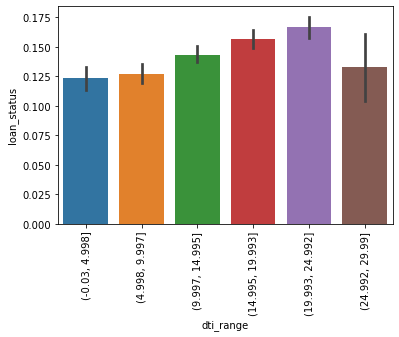

In [300]:
sns.barplot(x="dti_range",y="loan_status",data=loan)
plt.xticks(rotation=90)
plt.show()

In [301]:
# We can see that a negative corelation between dti and income.
# Also it has been noted that higher the number of dti ,higher the defaulters

# Bivariate Analysis

# funded_amnt_inv_range VS term

<AxesSubplot:xlabel='funded_amnt_inv_range', ylabel='loan_status'>

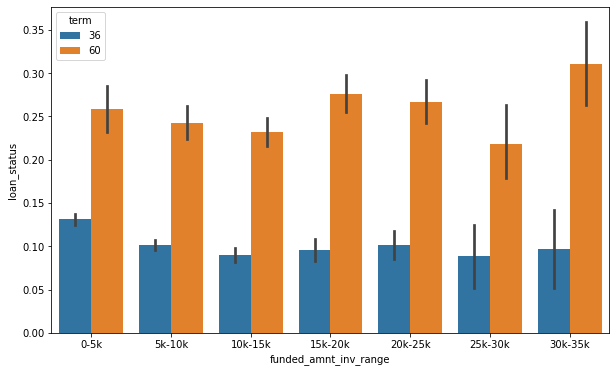

In [302]:
plt.figure(figsize=[10,6])
sns.barplot(loan.funded_amnt_inv_range,loan.loan_status,hue=loan.term)

In [303]:
# We can see that with increase in funded_amnt_inv , default rate is decreasing with 36 term and but increreasing in 60 term

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

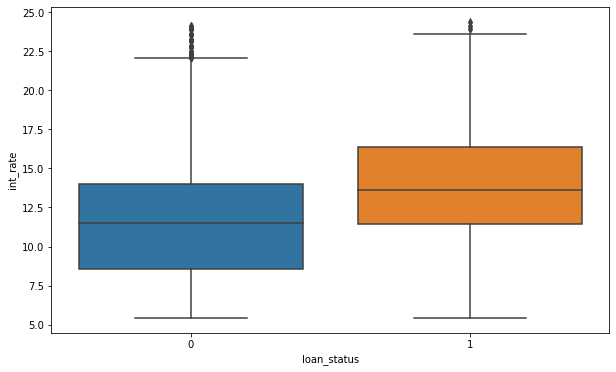

In [304]:
plt.figure(figsize=[10,6])
sns.boxplot(x = 'loan_status', y = 'int_rate', data = loan)

In [305]:
# We can see that loans at high interest are more risky

# term VS int_rate

<AxesSubplot:xlabel='term', ylabel='int_rate'>

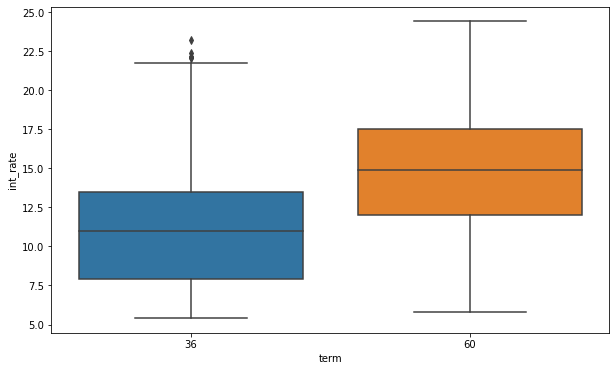

In [306]:
plt.figure(figsize=[10,6])
sns.boxplot(x = 'term', y = 'int_rate', data = loan)

In [307]:
# More interest rate is linked to 60 term

# grade VS int_rate

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

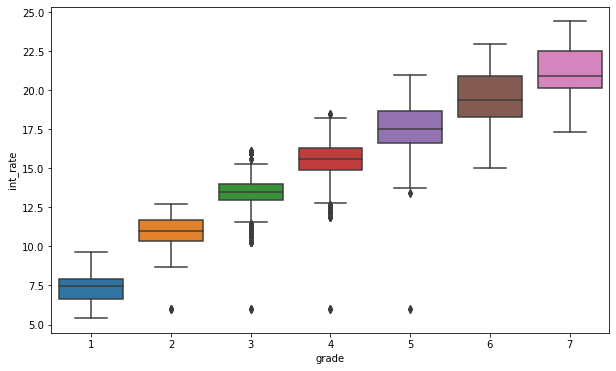

In [308]:
plt.figure(figsize=[10,6])
sns.boxplot(x = 'grade', y = 'int_rate', data = loan)

In [309]:
#Interest rate increasing with increase in grade
#We see the median going downwards with increase in grades depicting that higher the grade leads to higher percentage of people
#bearing high interest rates

# issue_year VS int_rate

<AxesSubplot:xlabel='issue_year', ylabel='int_rate'>

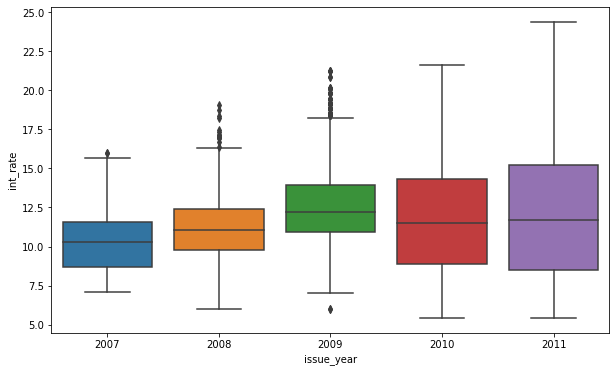

In [310]:
plt.figure(figsize=[10,6])
sns.boxplot(x = 'issue_year', y = 'int_rate', data = loan)

In [311]:
# We can see increase in interest rate with increase in years

# installment_range VS annual_inc

<AxesSubplot:xlabel='installment_range', ylabel='annual_inc'>

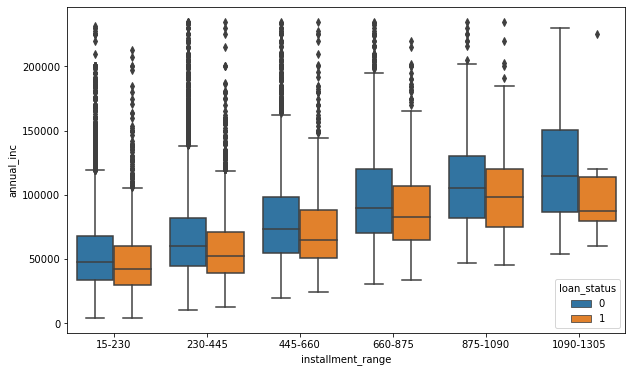

In [312]:
plt.figure(figsize=[10,6])
sns.boxplot(x = 'installment_range', y = 'annual_inc',hue="loan_status", data = loan)

In [313]:
# We can see that with increse in anual income, installment is also increasing and charged off decreasing

<AxesSubplot:xlabel='home_ownership', ylabel='int_rate'>

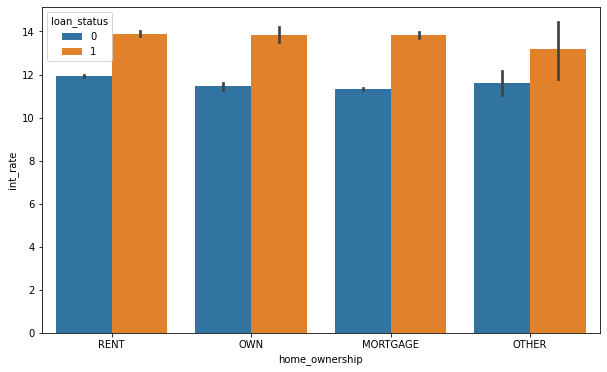

In [314]:
plt.figure(figsize=[10,6])
sns.barplot(x = 'home_ownership', y = 'int_rate',hue="loan_status", data = loan)

In [315]:
# Not useful as we can't see any trends

# issue_year VS addr_state

<AxesSubplot:xlabel='issue_year', ylabel='loan_status'>

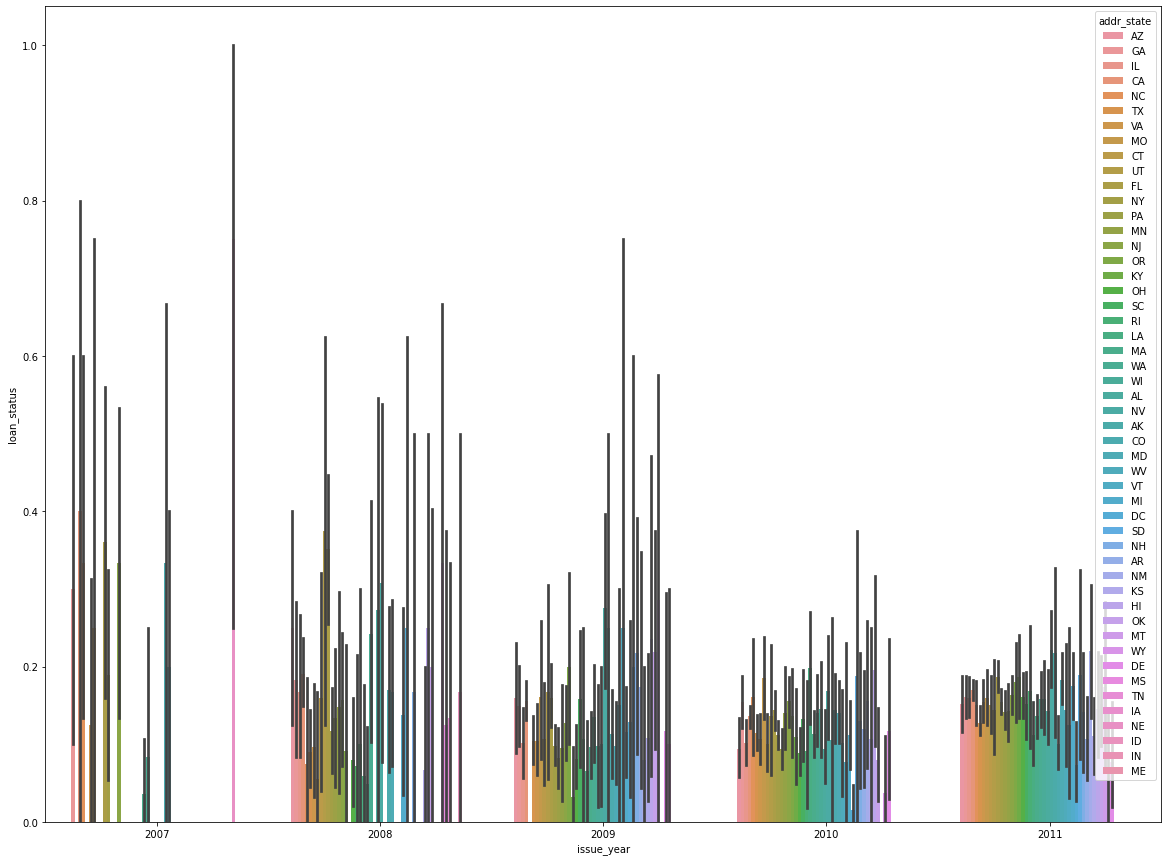

In [316]:
plt.figure(figsize=[20,15])
sns.barplot(x = 'issue_year', y = 'loan_status',hue="addr_state", data = loan)

# grade VS purpose

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

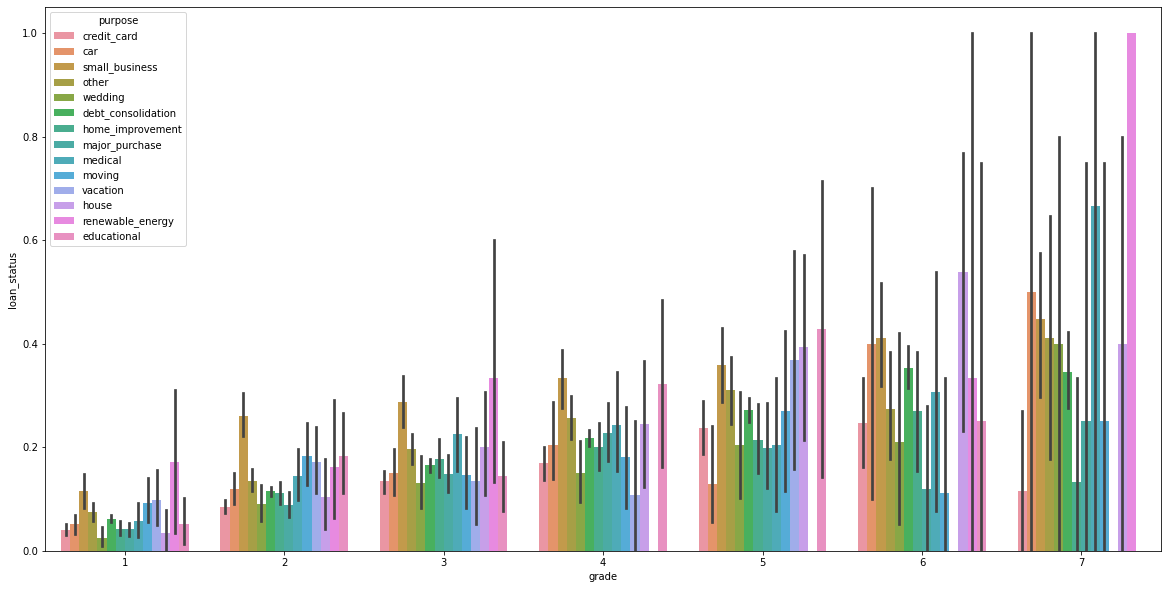

In [124]:
plt.figure(figsize=[20,10])
sns.barplot(loan.grade,loan.loan_status,hue=loan.purpose)

# addr_state VS term

<AxesSubplot:xlabel='addr_state', ylabel='loan_status'>

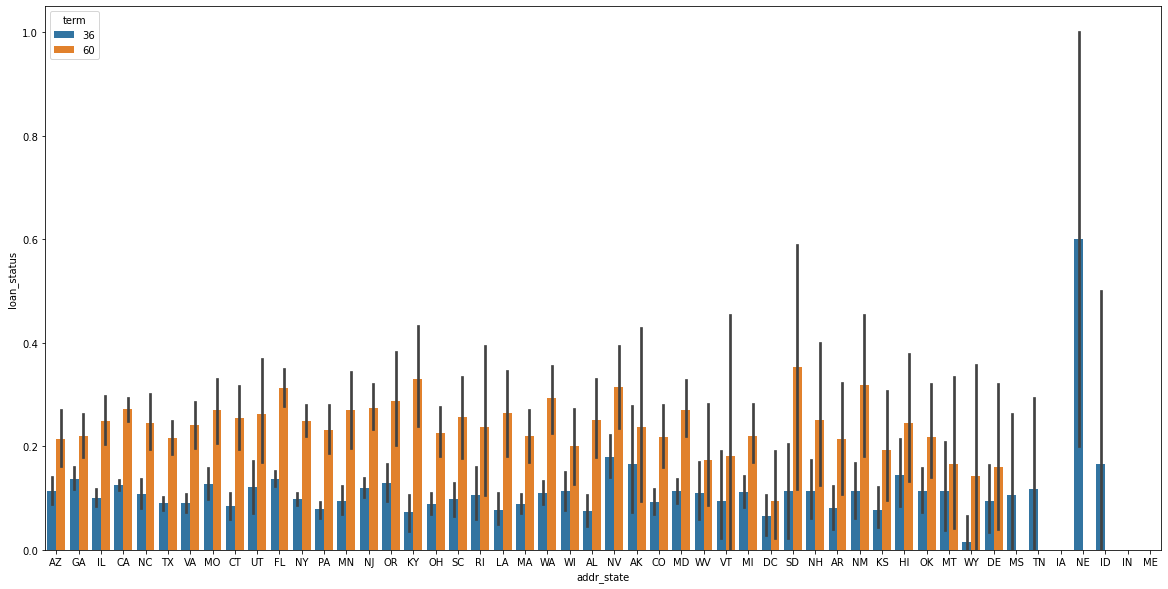

In [340]:
plt.figure(figsize=[20,10])
sns.barplot(loan.addr_state,loan.loan_status,hue=loan.term)

In [ ]:
# MS/TN/NE/Id  no loans have taken for 60 term and default is more

# Annual income vs loan purpose

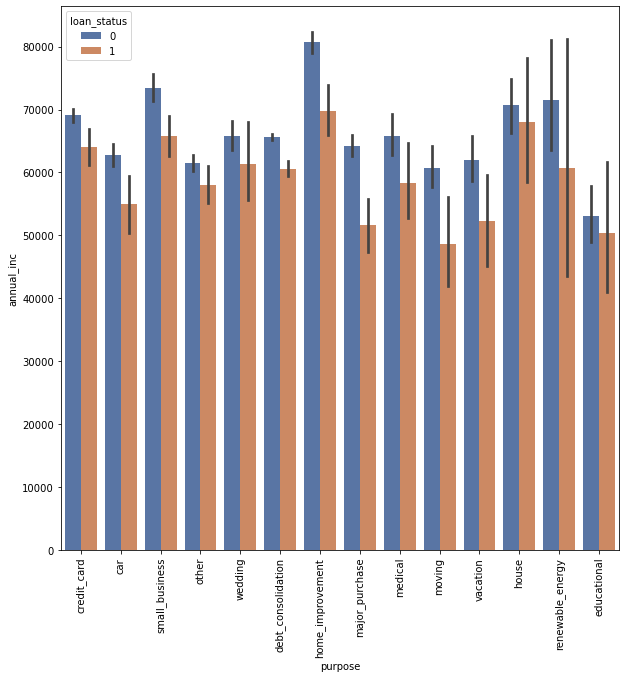

In [190]:

plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='purpose', y='annual_inc', hue ='loan_status',palette="deep")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# We can see that maxium number of loans are taken when salary is high for home_improvement/small business/house

 # funded_amnt_inv vs int_rate

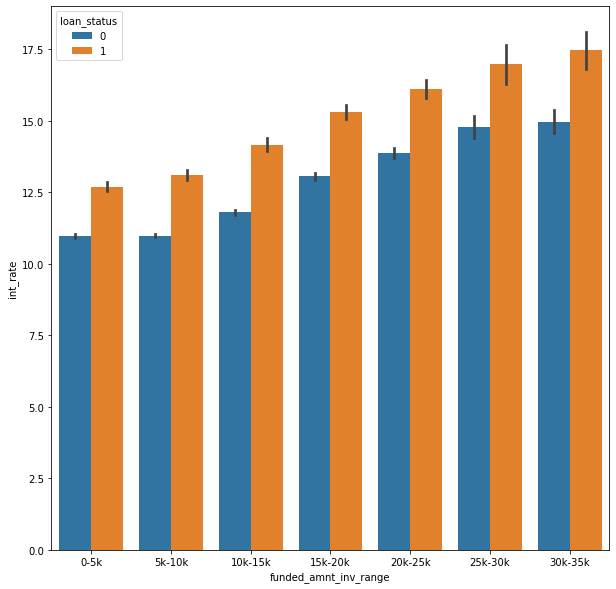

In [334]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='funded_amnt_inv_range', y='int_rate', hue ='loan_status')
plt.show()

In [ ]:
# We can see that with increase in funded_amnt range, rate of intrest increases. Also default loan increases

# funded_amnt_inv vs purpose

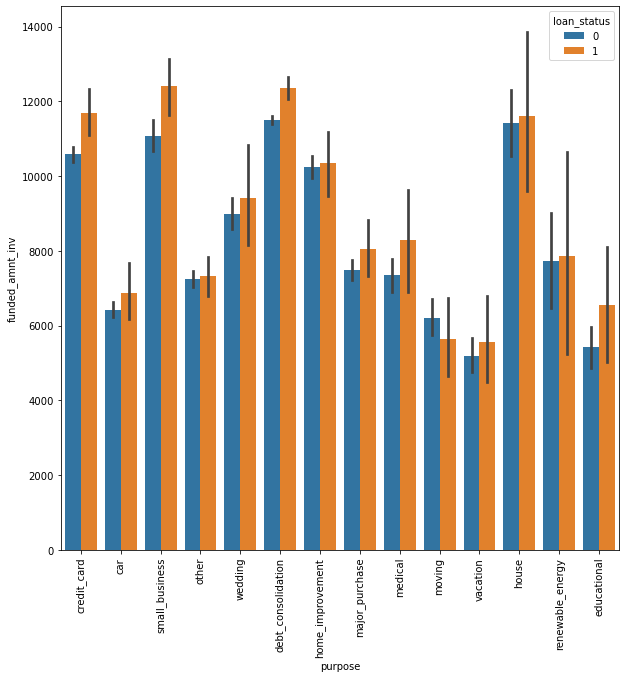

In [338]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='purpose', y='funded_amnt_inv', hue ='loan_status')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Maximum loans are taken for  debt_consolidation/small business/house/credit card

# Multivariate analysis

In [141]:
defaulter = loan[['loan_amnt',"funded_amnt_inv",'int_rate','installment','annual_inc','dti','term',"grade","emp_length","issue_year","issue_month"]]
correlation = defaulter.corr()

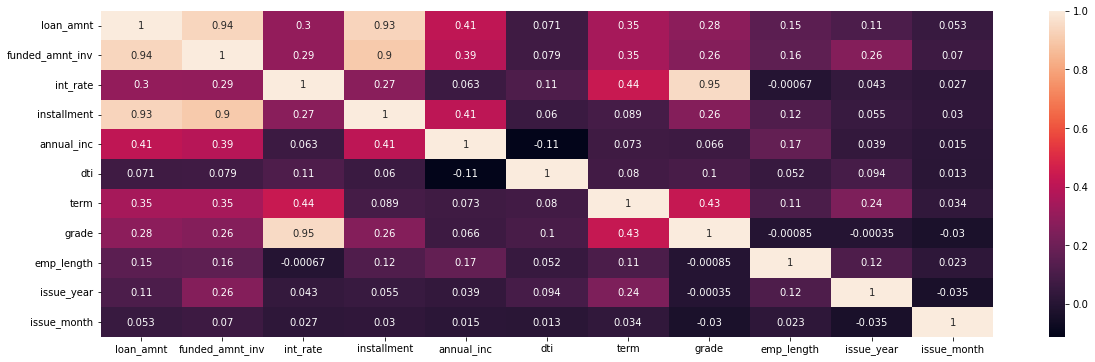

In [142]:
plt.figure(figsize=[20,6])
sns.heatmap(correlation,annot=True)
plt.show()

# Negative correlation
+ dti Vs annual_inc:- We see a decrement in dti with an increase in annual income
+ int_rate Vs emp_length:- We see a decrement in int_rate with increase in employment tenure
+ grade vs emp_length : With an increase in employment tenure we see lower grade value which is directly correlated 
+ to rate of interest charged to customer

# Positive Correlation
+ with an increase in grade, we saw an increase in interest rate
+ With an inrease in loan amount, we saw increase in installment
+ With an increase in annual income, we saw increase in installment with a higher capacity to bear loans
+ With an increase in term, we saw an increase in interest rate

# Business recommendation

+ We saw an increment in loan defaulters during economic down fall in 2007 year
+ We saw maximum number of loans in DECEMBER and JANUARY, then we see a down fall in february
+ Maximum number of education /credit card / debt consolidation/ medical
+ We saw that with an increase in grade (1-6) , default loan increases 
+ When checked through state graph we saw maximum number of defaulter in NE addr_state, whereas IE,IA,ME has zero default loans